In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron 

In [8]:
class_data = pd.read_csv('class.csv')
zoo_data = pd.read_csv('zoo.csv')

In [9]:
class_data.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [10]:
class_data.tail()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [11]:
zoo_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
zoo_data.tail()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [13]:
class_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


In [14]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [15]:
print(class_data.isnull().sum())

Class_Number                         0
Number_Of_Animal_Species_In_Class    0
Class_Type                           0
Animal_Names                         0
dtype: int64


In [16]:
print(zoo_data.isnull().sum())

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64


<AxesSubplot:xlabel='class_type', ylabel='count'>

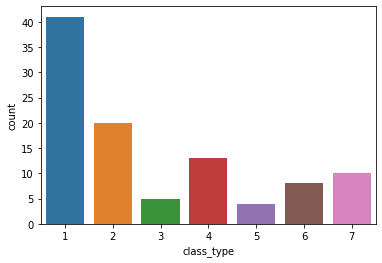

In [17]:
sns.countplot(x=zoo_data["class_type"])

In [19]:
class_data.describe()

,Class_Number,Number_Of_Animal_Species_In_Class
count,7.000000,7.000000
mean,4.000000,14.428571
std,2.160247,12.895182
min,1.000000,4.000000
25%,2.500000,6.500000
50%,4.000000,10.000000
75%,5.500000,16.500000
max,7.000000,41.000000


In [20]:
zoo_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [22]:
print(zoo_data.class_type.unique())

[1 4 2 7 6 5 3]


In [23]:
zoo_data.loc[zoo_data['legs'] == 5]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
85,starfish,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7


In [26]:
zoo_data.shape

(101, 18)

In [27]:
class_data.shape

(7, 4)

In [29]:
df=pd.merge(zoo_data, class_data, how='left', left_on='class_type', right_on='Class_Number')

In [31]:
df.to_csv(r'zoo_merge.csv', index=True)

In [34]:
X= zoo_data.iloc[:,1:17]
y = zoo_data.iloc[:,17]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [35]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [36]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: class_type, dtype: int64

In [43]:
import warnings
warnings.filterwarnings('ignore')
model1 = Perceptron(eta0=1.0,random_state=1)
model1.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [49]:
confusion_matrix(y_test, prediction1)

array([[15,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  3]], dtype=int64)

In [50]:
accuracy_score(y_test, prediction1)

0.967741935483871

In [52]:
precision_score(y_test, prediction1, average=None)

array([1. , 1. , 0.5, 1. , 0. , 1. , 1. ])

In [54]:
recall_score(y_test, prediction1, average=None)

array([1., 1., 1., 1., 0., 1., 1.])

In [58]:
f1_score(y_test,prediction1,average=None)

array([1.        , 1.        , 0.66666667, 1.        , 0.        ,
       1.        , 1.        ])